In [271]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from datetime import datetime as dt
import time
from astropy.time import Time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [272]:
#--------------#
#  Get points  #
#--------------#

#path_blob = '/Users/ciurlo/Documents/UCLA/KVS/prepare_cubes_and_files/proper_motions_Randy/'
#Z = np.loadtxt(path_blob + 'ZmotionRV2_noheader_4plot.txt')
#V = np.loadtxt(path_blob + 'VmotionRV2_noheader_4plot.txt')
#W = np.loadtxt(path_blob + 'WmotionRV2_noheader_4plot.txt')
#X7= np.loadtxt(path_blob + 'X7motionRV2_noheader.txt')
# format: MJD RA Dec e_RA e_Dec wave V_LSR(km/sec) e_V VCorr S0-14Xpix S0-14Ypix blobXpix blobYPix
path = '/Users/ciurlo/Documents/UCLA/KVS/prepare_cubes_and_files/'
G3 = np.loadtxt(path + 'properPmotions_Randy_latest/G3motionRV_noheader_noAll_badepochs.txt')
G4 = np.loadtxt(path + 'properPmotions_Randy_latest/G4motionRV_noheader_noAll_badepochs.txt')
G5 = np.loadtxt(path + 'properPmotions_Randy_latest/G5motionRV_noheader_noAll_badepochs.txt')
G6 = np.loadtxt(path + 'proper_motions_Randy_new_objs/G6motionRV_noheader_noAll_badepochs.txt')
X7 = np.loadtxt(path + 'proper_motions_Randy_new_objs/X7motionRV_noheader_no2_badepochs.txt')

path_G = '/Users/ciurlo/Documents/UCLA/KVS/prepare_cubes_and_files/G_points/'
G1     = np.loadtxt(path_G + 'G1.points')
G2     = np.loadtxt(path_G + 'G2.points')
G3_G   = np.loadtxt(path_G + 'G3_fixed_gunther_ref.points')
# format: 2fracy RA DEC e_RA e_DEC

path_stars = '/Users/ciurlo/Documents/UCLA/KVS/prepare_cubes_and_files/points_1_1000_mjd_new/'
snames = ['S0-2'  ]#, 'S0-14'  , 'S0-12',  \
          #'irs16C', 'irs16SW', 'irs16NW', #]#, \
          #'irs13E1', 'irs13E2','irs13E4','irs1W', 'irs7SE', 'irs3E', #]
          #'S0-13'  , 'S0-15'  , 'S0-16' , 'S0-18',#]
          #'S0-4' , 'S0-5' , 'S0-1'  , 'S0-6'   , 'S0-8'   , 'S0-70' ,'S0-28', 'S0-7' , 'S0-11' , 
          #'S0-63'  , 'S0-60', 'S0-55' , 'S0-58'  , 'S0-50',  \
          #'S0-9'  , 'S0-73'  , 'S0-36'  , \
          #'S0-20' , 'S0-23'  , 'S0-24'  , 'S0-26' , 'S0-27' , 'S0-28' , 'S0-29' ]#, \
          #'S0-30' , 'S0-31'  , 'S0-32'  , 'S0-33' , 'S0-35' , 'S0-36' , 'S0-37' , 'S0-38' , 'S0-39']# , \
          #'S0-40' , 'S0-41'  , 'S0-42'  , 'S0-43' , 'S0-44' , 'S0-45' , 'S0-46' , 'S0-47' , 'S0-48' , 'S0-49']#, \
          #'S0-18' , 'S0-3'   , 'S0-17'  , 'S0-19']

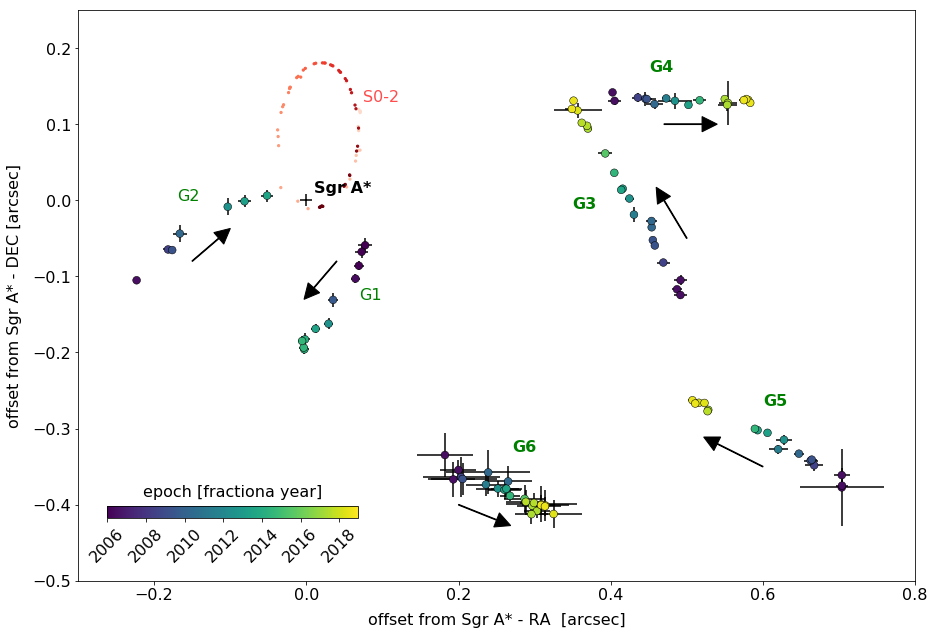

In [339]:
#------------#
# Plot stuff #
#------------#

fig = plt.figure(figsize=(15,15))

## OSIRIS FoV
#rect = Rectangle((-1.7,.7), 2.17, 2.9, angle=285, color='gray', fill=0, linestyle='--')
#plt.gca().add_patch(rect)

yeari = 2012.1
yearf = 2012.9

## Stars ##
for i in range(0, len(snames)):
    #print snames[i]
    S = np.loadtxt(path_stars + snames[i] + '.points')
    fracy = S[:,0]
    #iS = np.where(fracy >= yeari and fracy<=yearf)
    #print(fracy[iS[0]:iS[1]])
    # format: fracy_st, x_st, y_st, e_x_st, e_y_st, mjd_st
    mjd_s = S[:,5]
    plt.scatter( S[:,1], S[:,2], marker='.', c=mjd_s, cmap='Reds', s=20) #, alpha=0.3  #100 #color='red') #, c=mjd_s, cmap='Reds')
    plt.annotate(snames[i], [S[3,1],S[3,2]], [S[3,1]+0.005,S[3,2]+0.01], color='red', size=16, alpha=0.7)
    
off = 0.01

## G1 & G2 ##
fry_g1 = G1[:,0]
plt.errorbar(G1[:,1], G1[:,2], xerr=G1[:,3], yerr=G1[:,4], fmt='.', color='black', zorder=1)
plt.scatter( G1[:,1], G1[:,2], c=fry_g1, cmap='viridis', linewidths=.5, edgecolors='black', s=60, vmin=2006, vmax=2019, zorder=2) #100
plt.annotate('G1', [G1[0,1],G1[0,2]], [.07, -.13], color='green', size=16) #[G1[0,1]+off,G1[0,2]+off
fry_g2 = G2[:,0]
plt.errorbar(G2[:,1], G2[:,2], xerr=G2[:,3], yerr=G2[:,4], fmt='.', color='black', zorder=1)
g2 = plt.scatter( G2[:,1], G2[:,2], c=fry_g2, cmap='viridis', linewidths=.5, edgecolors='black', s=60, vmin=2006, vmax=2019, zorder=2) #100
plt.annotate('G2', [G2[0,1],G2[0,2]], [-.17, 0.], color='green', size=16) #G2[0,1]+off,G2[0,2]-off*2
#plt.colorbar(g2)
#fry_g3 = G3[:,0]
#plt.scatter( G3[:,1], G3[:,2], c=fry_g3, cmap='winter')
#plt.annotate('G3', [G3[0,1],G3[0,2]], [G3[0,1]+off,G3[0,2]+off], color='blue', size=15)
#print fry_g1
#print fry_g2

## Blobs ##
mjd = G3[:,0]
t = Time(mjd, format='mjd')
fracy = t.decimalyear
#export_array = numpy.array(fracy)
plt.errorbar(G3[:,1], G3[:,2], xerr=G3[:,3], yerr=G3[:,4], fmt='.', color='black', zorder=1)
plt.scatter( G3[:,1], G3[:,2], c=fracy, cmap='viridis', linewidths=.5, edgecolors='black', s=60, vmin=2006, vmax=2019, zorder=2) #100
#plt.annotate('G3', [G3[0,1],G3[0,2]], [G3[0,1]+off*2,G3[0,2]+off], color='green', size=20) #v
plt.annotate('G3', [G3[0,1],G3[0,2]], [.35, -.01], color='green', size=16, fontweight='bold') #v #G3[0,1]-off*8,G3[0,2]+off

mjd = G4[:,0]
t = Time(mjd, format='mjd')
fracy = t.decimalyear
plt.errorbar(G4[:,1], G4[:,2], xerr=G4[:,3], yerr=G4[:,4], fmt='.', color='black', zorder=1)
plt.scatter( G4[:,1], G4[:,2], c=fracy, cmap='viridis', linewidths=.5, edgecolors='black', s=60, vmin=2006, vmax=2019, zorder=2) #100
plt.annotate('G4', [G4[0,1],G4[0,2]], [.45, .17], color='green', size=16, fontweight='bold') #w # G4[0,1]+off*2,G4[0,2]+off*2

mjd = G5[:,0]
t = Time(mjd, format='mjd')
fracy = t.decimalyear
plt.errorbar(G5[:,1], G5[:,2], xerr=G5[:,3], yerr=G5[:,4], fmt='.', color='black', zorder=1)
w = plt.scatter( G5[:,1], G5[:,2], c=fracy, cmap='viridis', linewidths=.5, edgecolors='black', s=60, vmin=2006, vmax=2019, zorder=2) #100
plt.annotate('G5', [G5[0,1],G5[0,2]], [.6, -.27], color='green', size=16, fontweight='bold') #z #G5[0,1]+off*2,G5[0,2]+off*2

mjd = G6[:,0]
t = Time(mjd, format='mjd')
fracy = t.decimalyear
plt.errorbar(G6[:,1], G6[:,2], xerr=G6[:,3], yerr=G6[:,4], fmt='.', color='black', zorder=1)
plt.scatter( G6[:,1], G6[:,2], c=fracy, cmap='viridis', linewidths=.5, edgecolors='black', s=60, vmin=2006, vmax=2019, zorder=2) #100
plt.annotate('G6', [G6[0,1],G6[0,2]], [.27, -.33], color='green', size=16, fontweight='bold') #V #G6[0,1]+off*4,G6[0,2]+off*3

mjd = X7[:,0]
#plt.scatter( X7[:,1], X7[:,2], c=mjd, cmap='summer', linewidths=.5, edgecolors='black', s=20) #100)
##plt.scatter( X7[0,1], X7[0,2], color='green', linewidths=.5, edgecolors='black', s=40) #100)
#plt.annotate('X7', [X7[0,1],X7[0,2]], [X7[0,1]+off*2,X7[0,2]+off], color='green', size=16) #V

####################################
cbar = plt.colorbar(shrink=.3, use_gridspec=False, anchor=(0.05,2.8), orientation='horizontal')
cbar.set_label('epoch [fractiona year]', rotation=0, fontsize=16, labelpad=-80) #pad=0
barl = cbar.ax.get_xticklabels()
cbar.ax.set_xticklabels(barl, rotation=45)

## IR excess sources (Sitarski 2016) ##
#IRES  =np.array([[-0.07,0.25,-0.48,0.58,-0.62,0.26,-0.54,-1.02,-0.48,-0.57,-1.04,-0.35,-0.33,0.67,1.34,0.71,0.004],  # RA
#        [-0.07,-0.12,-0.13, 0.03, -0.12,-0.35, 0.00,-0.46,-0.52,-0.73,-1.01,-1.24,-1.43,-0.55,0.97,0.84]] )  # DEC
#IRESname = ['g1','g2','g3','g6','g7','g4','g5','g11','Comet','g9','g13','g12','g14','g8','g15','g10']
#for i in range(0, len(IRESname)):
#    plt.plot( -IRES[0][i], IRES[1][i], '^', color='magenta', markersize=8)
#    plt.annotate(IRESname[i], [-IRES[0][i], IRES[1][i]], [-IRES[0][i]+off*2, IRES[1][i]-off*5], color='magenta', size=16)

## IR excess sources (Eckart+2013) ## Positions a bit off?
#DSO  =np.array([[-0.515,+0.699,+0.585,-0.321,-0.048,-0.623,+0.547,-0.540,+1.338,+0.187],  # RA
#                [-0.114,-0.520,-0.959,-1.238,-1.546,-0.045,+0.030,-0.520,+1.003,+0.065]] )  # DEC
#DSOname = ['D2/S43','D6/S79','S90','F1','F2','D3','D5','D4/S50/X7','D7','DSO']
#for i in range(0, len(DSOname)):
#    plt.plot( -DSO[0][i], DSO[1][i], '*', color='darkorange', markersize=8)
#    plt.annotate(DSOname[i], [-DSO[0][i], DSO[1][i]], [-DSO[0][i]+off*2, DSO[1][i]+off], color='orange', size=16)

plt.axis('equal')
#plt.xlim([-0.6, 0.6])#[-.3,.9])
#plt.ylim([-0.6, 0.6])#[-.25,.25])
#plt.xlim([-1.3,1.3])
#plt.ylim([-1.7,1.3])
##plt.xlim([-1.75,1.7])
##plt.ylim([-1.45,1.45])
#plt.xlim([-.3,.9])
#plt.ylim([-.25,.25])
plt.xlim([-.35,.85])
plt.ylim([-.5,.25])

plt.xlabel('offset from Sgr A* - RA  [arcsec]', fontsize=16, labelpad=10)
plt.ylabel('offset from Sgr A* - DEC [arcsec]', fontsize=16, labelpad=10)
plt.scatter(0,0,marker ='+',color='black', s=150)
plt.annotate('Sgr A*', [0,0], [0.01,0.01], color='black', size=16, fontweight='bold')

## Arrows
plt.arrow(-0.15, -0.08, 0.035, 0.03, head_width=0.02, head_length=0.02, fc='k', ec='k')
plt.arrow(0.04, -0.08, -0.03, -0.035, head_width=0.02, head_length=0.02, fc='k', ec='k')
plt.arrow(0.47, 0.1, 0.05, 0., head_width=0.02, head_length=0.02, fc='k', ec='k')
plt.arrow(0.5, -0.05, -0.03, 0.05, head_width=0.02, head_length=0.02, fc='k', ec='k')
plt.arrow(0.6, -0.35, -0.06, 0.03, head_width=0.02, head_length=0.02, fc='k', ec='k')
plt.arrow(0.2, -0.4, 0.05, -0.02, head_width=0.02, head_length=0.02, fc='k', ec='k')

## Legend
#dl=0.
#plt.arrow(-0.27-dl, 0.53, 0.03, 0., head_width=0.02, head_length=0.02, fc='k', ec='k')
#plt.annotate('motion direction', [-0.27-dl, 0.53], [-0.27-dl + 0.06, 0.53-0.008], color='black', size=18)
#plt.scatter(-0.25-dl, 0.5, marker='.', alpha=0.8, color='red', s=100) 
#plt.annotate('stars', [-0.27-dl, 0.5], [-0.27-dl + 0.06, 0.5-0.008], color='black', size=18)
#plt.scatter( [-0.25-dl, -0.23], [0.47,0.47], c=[0,1], cmap='viridis', linewidths=.5, edgecolors='black', s=100, vmin=2006, vmax=2019)
#lt.annotate('G-objects', [-0.27-dl, 0.47], [-0.27-dl + 0.06, 0.47-0.008], color='black', size=18)
#plt.scatter( [-0.25-dl, -0.23], [0.44,0.44], c=[0,1], cmap='winter', linewidths=.5, edgecolors='black', s=100)
#plt.annotate('old   G-objects', [-0.27-dl, 0.44], [-0.27-dl + 0.06, 0.44-0.008], color='black', size=18)

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
#ax.yaxis.label.set_size(16)

plt.savefig('prop_mot.jpeg')
#plt.savefig('prop_mot.png')
#plt.savefig('prop_mot.eps')

plt.show()

In [ ]:
#plt.errorbar(Z[:,1], Z[:,2], xerr=Z[:,3], yerr=Z[:,4],ls='None',lw=1,marker='',color='black')
#plt.errorbar(V[:,1], V[:,2], xerr=V[:,3], yerr=V[:,4], ls='None',lw=1,marker='o')
#plt.errorbar(W[:,1], W[:,2], xerr=W[:,3], yerr=W[:,4], ls='None',lw=1,marker='o')
#plt.errorbar(X7[:,1], X7[:,2], xerr=X7[:,3], yerr=X7[:,4], ls='None',lw=1,marker='o')

#plt.title(blob+' orbit')#' -- Youhouh, this is still my first orbital fit')
#plt.plot(mod[:,2],mod[:,5],lw=1,color='green',ls='--')
#plt.ylim([-.3,.3])